         Date    Y   X1   X2   X3   X4   X5
0   2021/10/7  855  857  858  859  858  857
1   2021/10/8  865  855  857  858  859  858
2  2021/10/11  861  865  855  857  858  859
3  2021/10/12  855  861  865  855  857  858
4  2021/10/13  851  855  861  865  855  857
5  2021/10/14  853  851  855  861  865  855
6  2021/10/15  861  853  851  855  861  865
7  2021/10/18  851  861  853  851  855  861
8  2021/10/19  855  851  861  853  851  855
9  2021/10/20  862  855  851  861  853  851
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    246 non-null    object
 1   Y       246 non-null    int64 
 2   X1      246 non-null    int64 
 3   X2      246 non-null    int64 
 4   X3      246 non-null    int64 
 5   X4      246 non-null    int64 
 6   X5      246 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.6+ KB
None
                Y          X1   

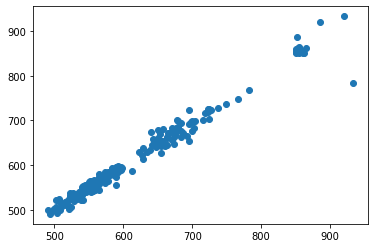

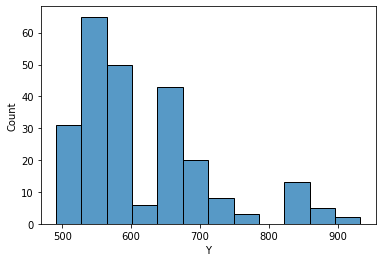

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

data=pd.read_csv("/content/2054.TW.csv")
print(data.head(10))
print(data.info())
print(data.describe())

plt.scatter(data.X1,data.Y)
# plt.scatter(data.X2,data.Y)
# plt.scatter(data.X3,data.Y)
# plt.scatter(data.X4,data.Y)
# plt.scatter(data.X5,data.Y)
plt.show()

sns.histplot(data.Y)

In [127]:
import numpy as np

X = data['X1'].values.reshape(-1,1)
X = X[np.isfinite(X)].reshape(-1,1)
Y = data['Y'].values.reshape(-1,1)
Y = Y[np.isfinite(Y)].reshape(-1,1)

print(type(X),X.shape)
print(type(Y),Y.shape)
data2=data.values
print(type(data2),data2.shape)

<class 'numpy.ndarray'> (246, 1)
<class 'numpy.ndarray'> (246, 1)
<class 'numpy.ndarray'> (246, 7)


Lasso(alpha=0.1)
a= 100 b= 5


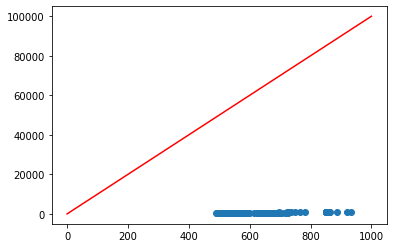

a= 0.9789186891099907 b= 11.699656333085045


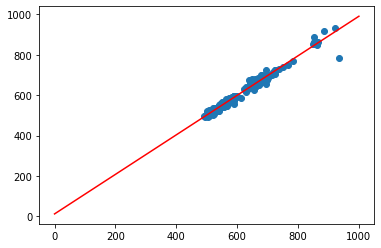

0.9789186891099907
11.699656333085045


In [128]:
from sklearn.linear_model import LinearRegression as LR
from sklearn import linear_model

# model selection
# using Lasso model
model = linear_model.Lasso(alpha=0.1)

print(model)
model.fit(X,Y)

# y=ax+b
a = float(model.coef_)
b = float(model.intercept_)

def plotmodel(a=100,b=5):
  print("a=",a,"b=",b)
  xm=np.array([0,1000])
  ym=a*xm+b
  plt.scatter(X,Y)
  plt.plot(xm,ym,'r')
  plt.show()

plotmodel()
plotmodel(a,b)
print(a)
print(b)

In [129]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_true = Y
y_pred = model.predict(X)
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print("r2=",r2)
print("mse=",mse)
print("mae=",mae)

r2= 0.9791054981581516
mse= 197.13333815879784
mae= 8.066557828478475


In [130]:
dataset = data.fillna(method='ffill')
X_ = dataset[['X1', 'X2', 'X3', 'X4', 'X5']].values

# using LinearRegression model
#80% Training set，20% Test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y, test_size=0.2, random_state=0)

model_LR = LR(fit_intercept=True)
model_LR.fit(X_train, Y_train)
# Y_test.flatten()

pred = model_LR.predict(X_) 

from sklearn import metrics
R2 = model_LR.score(X_,Y)
MSE = metrics.mean_squared_error(Y,pred)
MAE = metrics.mean_absolute_error(Y,pred)
print("R2=",R2)
print("mse=",MSE)
print("mae=",MAE)

# plt.scatter(X_,Y,s=200,label='Y True')
# plt.scatter(X_,pred,color='r',s=10,label='Predicted')
# plt.xlabel('X_')
# plt.xlabel('Y')
# plt.legend()
# plt.show()

print(model_LR.coef_)
print(model_LR.intercept_)

R2= 0.9790614979865034
mse= 197.54846653956596
mae= 8.711904961508123
[[ 1.01771648 -0.2721641   0.10779182  0.13882693 -0.01956566]]
[15.11842577]


In [131]:
# Lasso Regression
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.linear_model import Lasso

lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, Y, cv=5))

[0.92005761 0.47921352 0.9064304  0.8230377  0.80875097]


In [132]:
preY = pd.DataFrame(y_pred)
preY.shape
preY.head()

,0
0,850.632973
1,848.675136
2,858.464322
3,854.548648
4,848.675136
